In [4]:
import pandas as pd

In [5]:
input_data_file="LKR_USD_2010_2024_09_27.csv"

# read only first 3 colums  
df = pd.read_csv(input_data_file, usecols=[0,1])
# rename
df.columns = ['Date', 'USDLKR']

# convert date Month Day Year to Year Month Day
df['Date'] = pd.to_datetime(df['Date']).dt.strftime('%Y-%m-%d')

df.head()

,Date,USDLKR
0,2024-09-27,300.2152
1,2024-09-26,301.7592
2,2024-09-25,303.9075
3,2024-09-24,304.4214
4,2024-09-23,304.8847


In [6]:
plotdf = df.copy()
# filter data after 2015    
plotdf = plotdf[plotdf['Date'] >= '2015-01-01']

# sort data by date 
plotdf = plotdf.sort_values(by='Date', ascending=True)

In [12]:
brent_oil_price_file="./BrentOilFuturesHistoricalData.csv"
brent_oil_price = pd.read_csv(brent_oil_price_file)

brent_oil_price = brent_oil_price[['Date', 'Price']]

brent_oil_price['Date'] = pd.to_datetime(brent_oil_price['Date'])


# sort data by date descending
brent_oil_price = brent_oil_price.sort_values(by='Date', ascending=True)

# filter data after 2015
brent_oil_price = brent_oil_price[brent_oil_price['Date'] >= '2015-01-01']

brent_oil_price.head()


,Date,Price
116,2015-01-01,52.99
115,2015-02-01,62.58
114,2015-03-01,55.11
113,2015-04-01,66.78
112,2015-05-01,65.56


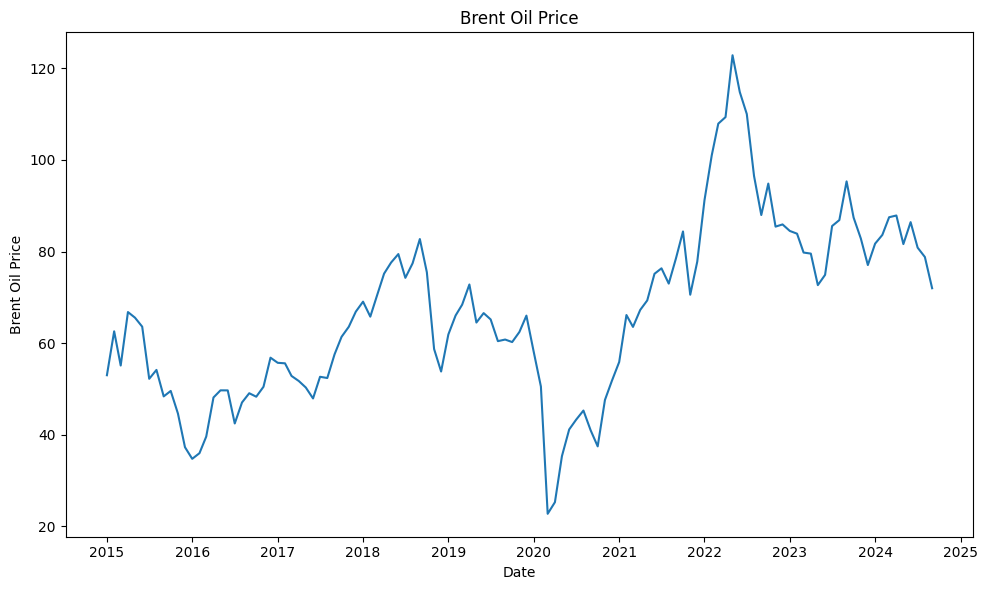

In [13]:
# plot data
import matplotlib.pyplot as plt

# Plotting the data Date vs USDLKR in line plot
plt.figure(figsize=(10, 6))
plt.plot(brent_oil_price['Date'], brent_oil_price['Price'])
plt.xlabel('Date')
plt.ylabel('Brent Oil Price')
plt.title('Brent Oil Price')

plt.tight_layout()
plt.show()



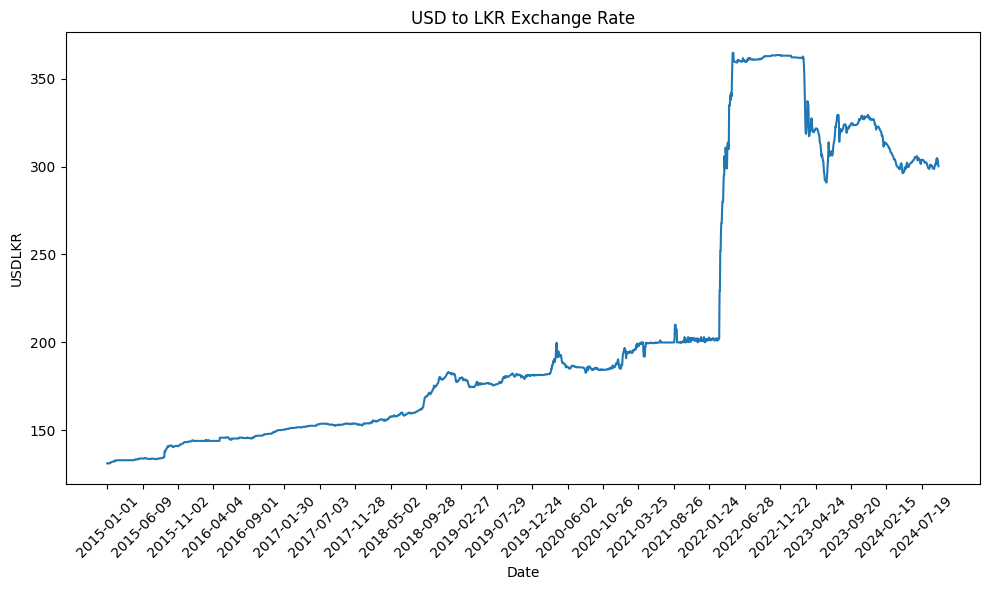

In [8]:
import matplotlib.pyplot as plt

# Plotting the data Date vs USDLKR in line plot
plt.figure(figsize=(10, 6))
plt.plot(plotdf['Date'], plotdf['USDLKR'])
plt.xlabel('Date')
plt.ylabel('USDLKR')
plt.title('USD to LKR Exchange Rate')

# Set the x-ticks to show every Nth label
N = 100  # Adjust N as needed to control the frequency of labels
plt.xticks(plotdf['Date'][::N], rotation=45)

plt.tight_layout()
plt.show()


In [9]:
fuel_data_file="output_1.csv"

# read to pandas dataframe
fuel_df = pd.read_csv(fuel_data_file)

fuel_df = fuel_df[['Date', 'LP 92','LP 95', 'LAD']]
fuel_df['Date'] = pd.to_datetime(fuel_df['Date'])

# plot only after 2005
fuel_df = fuel_df[fuel_df['Date'] > '2015-01-01']

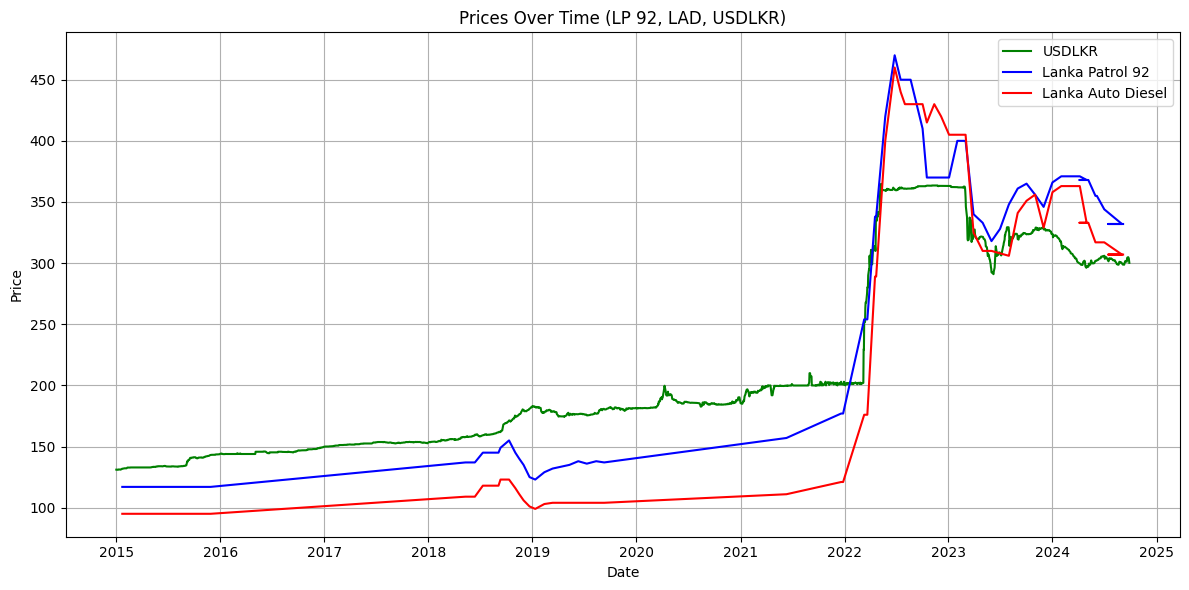

In [10]:
# plot fuel price and LKRUSD in same plot 
 # Ensure your date columns are in datetime format
plotdf['Date'] = pd.to_datetime(plotdf['Date'])
fuel_df['Date'] = pd.to_datetime(fuel_df['Date'])

# Plotting the data
plt.figure(figsize=(12, 6))


# Plot USD to LKR
plt.plot(plotdf['Date'], plotdf['USDLKR'], color='g', label='USDLKR')

# # Plot LP 92
plt.plot(fuel_df['Date'], fuel_df['LP 92'], color='b', label='Lanka Patrol 92')

# # Plot LAD
plt.plot(fuel_df['Date'], fuel_df['LAD'], color='r', label='Lanka Auto Diesel')



# Adding plot title and labels
plt.title('Prices Over Time (LP 92, LAD, USDLKR)')
plt.xlabel('Date')
plt.ylabel('Price')

# N = 100  # Adjust N as needed to control the frequency of labels
# plt.xticks(plotdf['Date'][::N], rotation=45)

plt.grid(True)
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()